In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
def preprocess(text):
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if not t in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text


In [3]:
df = pd.read_csv("E:\\Desktop\\ADIT_6\\csa\\TESTDATA\\Reviews 2.csv")
df = df.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis=1)
df['sentiment'] = df['Score'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')
df.head()

,Id,Score,Summary,Text,sentiment
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,positive


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['sentiment'], test_size=0.2, random_state=42)

# Define the vectorizers
count_vectorizer = CountVectorizer(preprocessor=preprocess)
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess)

# Define the models
logreg_model = LogisticRegression(max_iter=5000)
nb_model = MultinomialNB()
svm_model = SVC(max_iter=5000)
rf_model = RandomForestClassifier(n_estimators=100)

# Define the pipelines
logreg_pipeline = Pipeline([('vect', count_vectorizer),
                            ('clf', logreg_model)])
nb_pipeline = Pipeline([('vect', count_vectorizer),
                        ('clf', nb_model)])
svm_pipeline = Pipeline([('vect', tfidf_vectorizer),
                        ('clf', svm_model)])
rf_pipeline = Pipeline([('vect', tfidf_vectorizer),
                        ('clf', rf_model)])


In [13]:
logreg_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocess at 0x000001FF1E0B8860>)),
                ('clf', RandomForestClassifier())])

In [14]:
logreg_y_pred = logreg_pipeline.predict(X_test)
nb_y_pred = nb_pipeline.predict(X_test)
svm_y_pred = svm_pipeline.predict(X_test)
rf_y_pred = rf_pipeline.predict(X_test)


In [16]:
print('Logistic Regression Classification Report:\n', classification_report(y_test, logreg_y_pred))
print('Multinomial Naive Bayes Classification Report:\n', classification_report(y_test, nb_y_pred))
print('Support Vector Machine Classification Report:\n', classification_report(y_test, svm_y_pred))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.70      0.74     16181
     neutral       0.56      0.32      0.40      8485
    positive       0.91      0.97      0.94     89025

    accuracy                           0.88    113691
   macro avg       0.75      0.66      0.69    113691
weighted avg       0.87      0.88      0.87    113691

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.64      0.65     16181
     neutral       0.35      0.33      0.34      8485
    positive       0.91      0.92      0.91     89025

    accuracy                           0.83    113691
   macro avg       0.64      0.63      0.63    113691
weighted avg       0.83      0.83      0.83    113691

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

    negative       0.41      0.68      0.51 

In [26]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for each model
logreg_acc = accuracy_score(y_test, logreg_y_pred)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
svm_acc = accuracy_score(y_test, svm_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred)

# Print the accuracy scores
print('Logistic Regression Accuracy:', logreg_acc)
print("Naive Bayes accuracy:", nb_accuracy)
print('SVM Accuracy:', svm_acc)
print('Random Forest Accuracy:', rf_acc)


Logistic Regression Accuracy: 0.8796122824146151
Naive Bayes accuracy: 0.8343756321960402
SVM Accuracy: 0.7290374787802025
Random Forest Accuracy: 0.8856022024610567


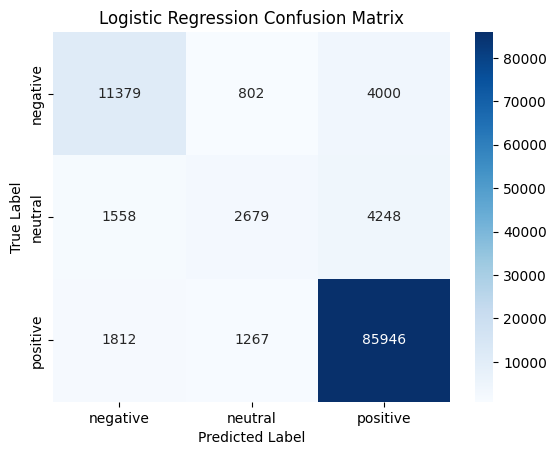

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the classes
classes = ['negative', 'neutral', 'positive']

# Create a confusion matrix for the  logistic regression model
logreg_cm = confusion_matrix(y_test,logreg_y_pred, labels=classes)

# Plot the confusion matrix using seaborn
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


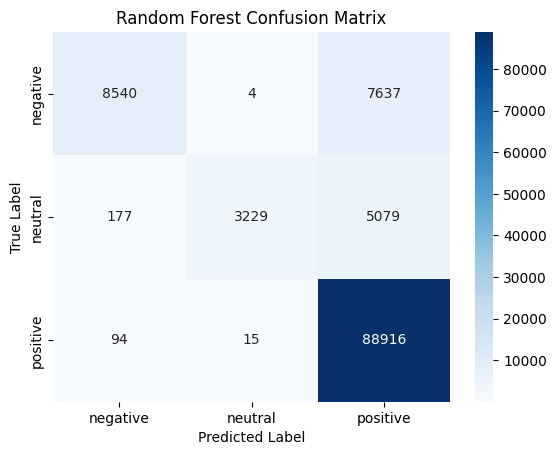

In [22]:
# Create a confusion matrix for the random forest model
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=classes)

# Plot the confusion matrix using seaborn
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


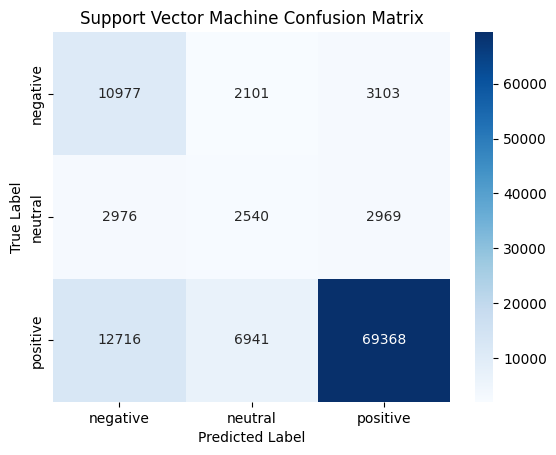

In [23]:
# Create a confusion matrix for the support vector machine model
svm_cm = confusion_matrix(y_test, svm_y_pred, labels=classes)

# Plot the confusion matrix using seaborn
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

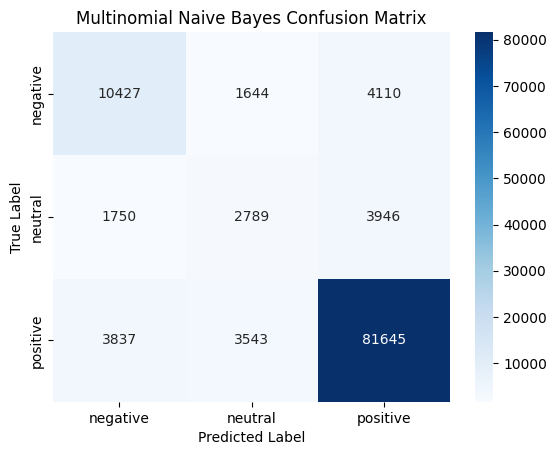

In [25]:
# Create a confusion matrix for the multinomial naive bayes model
mnb_cm = confusion_matrix(y_test, nb_y_pred, labels=classes)

# Plot the confusion matrix using seaborn
sns.heatmap(mnb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
import joblib

# Saving the models to job files
joblib.dump(logreg_pipeline, 'logreg_pipeline.joblib')
joblib.dump(nb_pipeline, 'nb_pipeline.joblib')
joblib.dump(svm_pipeline, 'svm_pipeline.joblib')
joblib.dump(rf_pipeline, 'rf_pipeline.joblib')

['rf_pipeline.joblib']